In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def perturb_and_plot_roots(base_poly, num_samples=100, stdev=1, bins=128):
    perturb = np.random.normal(
        size=(num_samples, base_poly.shape[0], 2),
        scale=stdev
    ).view(np.complex128)[:, :, 0]
    perturb[:, 0] = 0
    
    polys = base_poly + perturb
    
    roots = np.zeros((num_samples, base_poly.shape[0] - 1), dtype=np.complex128)
    for i in range(num_samples):
        roots[i] = np.roots(polys[i])
    
    max_radii = np.absolute(roots).max(axis=1)
    min_radii = np.absolute(roots).min(axis=1)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.hist(
        min_radii,
        bins=bins,
        range=(np.percentile(min_radii, 1) - 0.1, np.percentile(min_radii, 99) + 0.1),
        density=True,
    )
    plt.xlabel("min root radius")
    plt.title(f"deg={base_poly.shape[0] - 1}")
    
    plt.subplot(1, 2, 2)
    plt.hist(
        max_radii,
        bins=bins,
        range=(np.percentile(max_radii, 1) - 0.1, np.percentile(max_radii, 99) + 0.1),
        density=True,
    )
    plt.xlabel("max root radius")
    plt.title(f"deg={base_poly.shape[0] - 1}")

CPU times: user 2.69 s, sys: 23.4 ms, total: 2.71 s
Wall time: 2.72 s


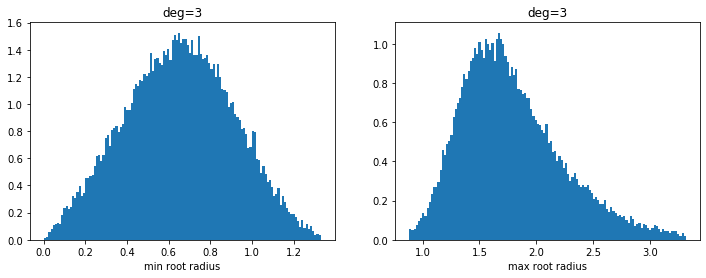

In [25]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 3 * [0], dtype=np.complex128),
    num_samples=40000
)

CPU times: user 1.29 s, sys: 10.6 ms, total: 1.3 s
Wall time: 1.31 s


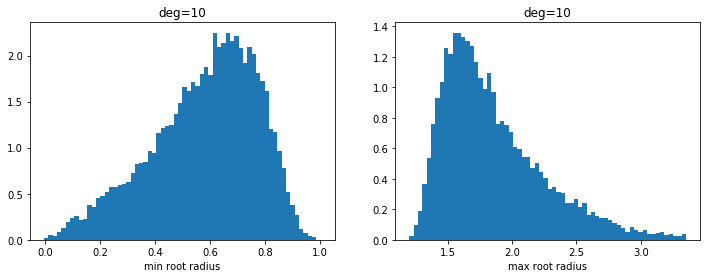

In [26]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 10 * [0], dtype=np.complex128),
    num_samples=10000,
    bins=64
)

CPU times: user 6min 6s, sys: 3.25 s, total: 6min 9s
Wall time: 1min 33s


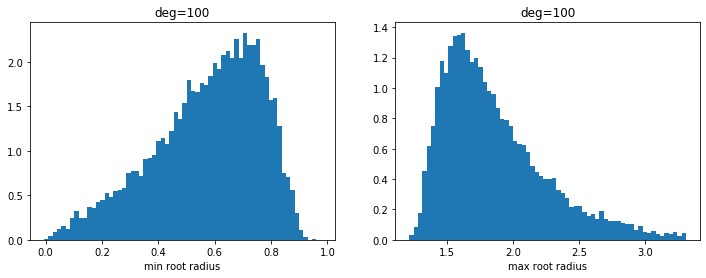

In [27]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 100 * [0], dtype=np.complex128),
    num_samples=10000,
    bins=64
)

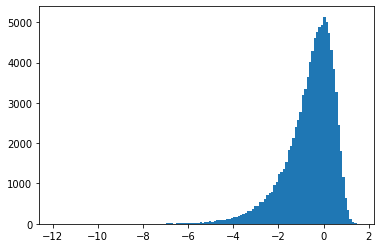

In [33]:
plt.hist(
    np.log(np.abs(np.random.normal(size=100000))),
    bins=128
);